In [9]:
#Word frequency analysis of Elon Musk's tweets from 2017 to 2022 to identify which topics he tweets the most about 

In [2]:
!pip install tokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 KB 3.0 MB/s eta 0:00:00


In [3]:
import pandas as pd
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.util import ngrams
from nltk.corpus import stopwords
import itertools
import collections
from nltk import bigrams
from tokenizer import tokenize
import re
import seaborn as sn
import matplotlib.pyplot as plt
import networkx as nx

In [4]:
tweets_2017 = pd.read_csv("2017.csv", usecols = ['tweet'])
tweets_2018 = pd.read_csv("2018.csv", usecols = ['tweet'])
tweets_2019 = pd.read_csv("2019.csv", usecols = ['tweet'])
tweets_2020 = pd.read_csv("2020.csv", usecols = ['tweet'])
tweets_2021 = pd.read_csv("2021.csv", usecols = ['tweet'])
tweets_2022 = pd.read_csv("2022.csv", usecols = ['tweet'])

In [5]:
tweets_2017.head()

,tweet
0,@neilsiegel @Tesla Coming very soon
1,@Kreative Vastly better maps/nav coming soon
2,@dd_hogan Ok
3,@Jason @Tesla Sure
4,"@kabirakhtar Yeah, it’s terrible. Had to upgra..."


In [6]:
#Identify the Stopwords
nltk.download('stopwords')
stopwords_list = stopwords.words("english")
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
#Custom function to clean the tweets and remove stop words
def clean(tweet):
    temp = tweet.lower()    # converting all letters to lowercase
    temp = re.sub("'", "", temp)  # removing contractions
    temp = re.sub("@[\S]+","", temp)  # removing mentions
    temp = temp.replace("#", "")  # removing hashtags but keeping the words associated with hashtags
    temp = re.sub(r'http\S+', '', temp)    # removing links
    temp = re.sub(r'[\.,()*!?&;]', '', temp) # removing punctuations
    temp = temp.replace("amp","") # remove 'amp' which is stored in the tweets everytime Musk uses '&' symbol instead of the word 'and' 
    temp = re.sub("[^a-z0-9]"," ", temp)   # removing non-alphanumeric characters like emojis
    temp = temp.split()
    temp = [w for w in temp if not w in stopwords_list] # removing stop words
    temp = " ".join(word for word in temp)
    return temp

In [10]:
#Storing the cleaned tweets back in the tweet column
tweets_2017['tweet'] = tweets_2017['tweet'].map(lambda x: clean(x))
tweets_2018['tweet'] = tweets_2018['tweet'].map(lambda x: clean(x))
tweets_2019['tweet'] = tweets_2019['tweet'].map(lambda x: clean(x))
tweets_2020['tweet'] = tweets_2020['tweet'].map(lambda x: clean(x))
tweets_2021['tweet'] = tweets_2021['tweet'].map(lambda x: clean(x))
tweets_2022['tweet'] = tweets_2022['tweet'].map(lambda x: clean(x))

In [11]:
tweets_2017

,tweet
0,coming soon
1,vastly better maps nav coming soon
2,ok
3,sure
4,yeah terrible upgrade old linux os bunch drive...
...,...
3162,total non sequitur btw
3163,great voltaire quote arguably better twain hea...
3164,made volume model go 11 need work miniature st...
3165,went iceland sat ride bumper cars ice country ...


In [12]:
tweets = [tweets_2017,tweets_2018,tweets_2019,tweets_2020,tweets_2021,tweets_2022]

In [13]:
# Tokenize the tweets by words to compute word frequencies
# Custom function for tokenizing the tweets by words and computing word frequency
def word_freq(df):
  words = []
  for i in df['tweet']:
    words.append(word_tokenize(i))
  return FreqDist(pd.DataFrame(words).stack().rename('Words')) #using FreqDist from nltk.probability to compute word frequencies

In [ ]:
# Print word frequencies for each year 
nltk.download('punkt')
for i in tweets:
  wordfrequency = word_freq(i)
  print('Word Frequencies of tweets',*wordfrequency.items(), sep='\n')

In [16]:
# Top 10 words with highest value of frequency for each year
for i in tweets:
  wordfrequency = word_freq(i)
  print('Top 10 words', wordfrequency.most_common(10))

Top 10 words [('tesla', 308), ('model', 208), ('good', 171), ('rocket', 149), ('like', 137), ('yes', 132), ('launch', 112), ('next', 103), ('falcon', 99), ('car', 99)]
Top 10 words [('tesla', 290), ('car', 121), ('3', 112), ('yes', 107), ('good', 102), ('model', 98), ('like', 95), ('would', 77), ('people', 74), ('even', 65)]
Top 10 words [('tesla', 847), ('yes', 392), ('model', 373), ('good', 358), ('like', 315), ('car', 287), ('3', 281), ('would', 273), ('great', 243), ('time', 224)]
Top 10 words [('tesla', 1048), ('yes', 553), ('good', 471), ('model', 403), ('like', 395), ('great', 372), ('would', 369), ('3', 331), ('car', 329), ('much', 310)]
Top 10 words [('tesla', 213), ('great', 102), ('good', 98), ('much', 93), ('haha', 89), ('like', 89), ('would', 89), ('time', 86), ('beta', 77), ('high', 74)]
Top 10 words [('tesla', 62), ('people', 34), ('would', 32), ('yes', 32), ('one', 30), ('starlink', 28), ('good', 28), ('car', 26), ('great', 22), ('high', 22)]


It is observed that Tesla is the most frequently used word in Elon's tweets over the years. Tesla consistently dominates his feed along with the words model and car which are also related to Tesla. It is important to note how Starlink, which is the satellite network developed by SpaceX to provide low-cost internet has gained importance in his 2022 tweets. 

To get a better idea of what Elon tweets the most about, find frequencies of pairs of words(word co-occurrence analysis). 

In [17]:
# Custom function to generate bigrams from tweets
def bigrams(df):
  words = []
  for i in df['tweet']:
    words.append(word_tokenize(i))
  return nltk.bigrams(pd.DataFrame(words).stack().rename('Words'))

In [18]:
# Printing most common bigrams
for i in tweets:
  bg = bigrams(tweets_2017)
  bigram_counts = collections.Counter(bg)
  common_bigrams = bigram_counts.most_common(10)
  for i in common_bigrams:
    print(i)

(('model', '3'), 57)
(('falcon', '9'), 50)
(('model', 'x'), 32)
(('coming', 'soon'), 27)
(('space', 'station'), 25)
(('tesla', 'model'), 22)
(('falcon', 'heavy'), 21)
(('next', 'week'), 21)
(('cape', 'canaveral'), 21)
(('looks', 'like'), 20)
(('model', '3'), 57)
(('falcon', '9'), 50)
(('model', 'x'), 32)
(('coming', 'soon'), 27)
(('space', 'station'), 25)
(('tesla', 'model'), 22)
(('falcon', 'heavy'), 21)
(('next', 'week'), 21)
(('cape', 'canaveral'), 21)
(('looks', 'like'), 20)
(('model', '3'), 57)
(('falcon', '9'), 50)
(('model', 'x'), 32)
(('coming', 'soon'), 27)
(('space', 'station'), 25)
(('tesla', 'model'), 22)
(('falcon', 'heavy'), 21)
(('next', 'week'), 21)
(('cape', 'canaveral'), 21)
(('looks', 'like'), 20)
(('model', '3'), 57)
(('falcon', '9'), 50)
(('model', 'x'), 32)
(('coming', 'soon'), 27)
(('space', 'station'), 25)
(('tesla', 'model'), 22)
(('falcon', 'heavy'), 21)
(('next', 'week'), 21)
(('cape', 'canaveral'), 21)
(('looks', 'like'), 20)
(('model', '3'), 57)
(('falcon',

In [19]:
#Plotting bigram network graphs for each year to analyze word co-occurance in Elon's tweets

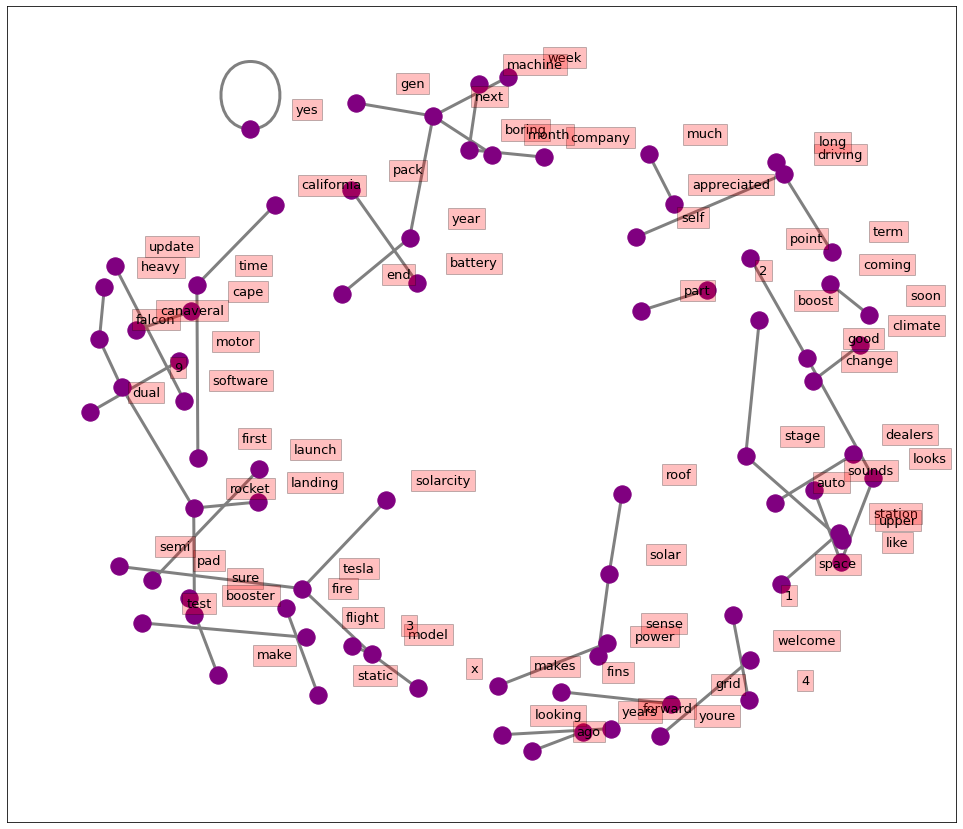

In [31]:
#2017
bg = bigrams(tweets_2017)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])  #using 50 most common bigrams for the network  

d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(17, 15))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

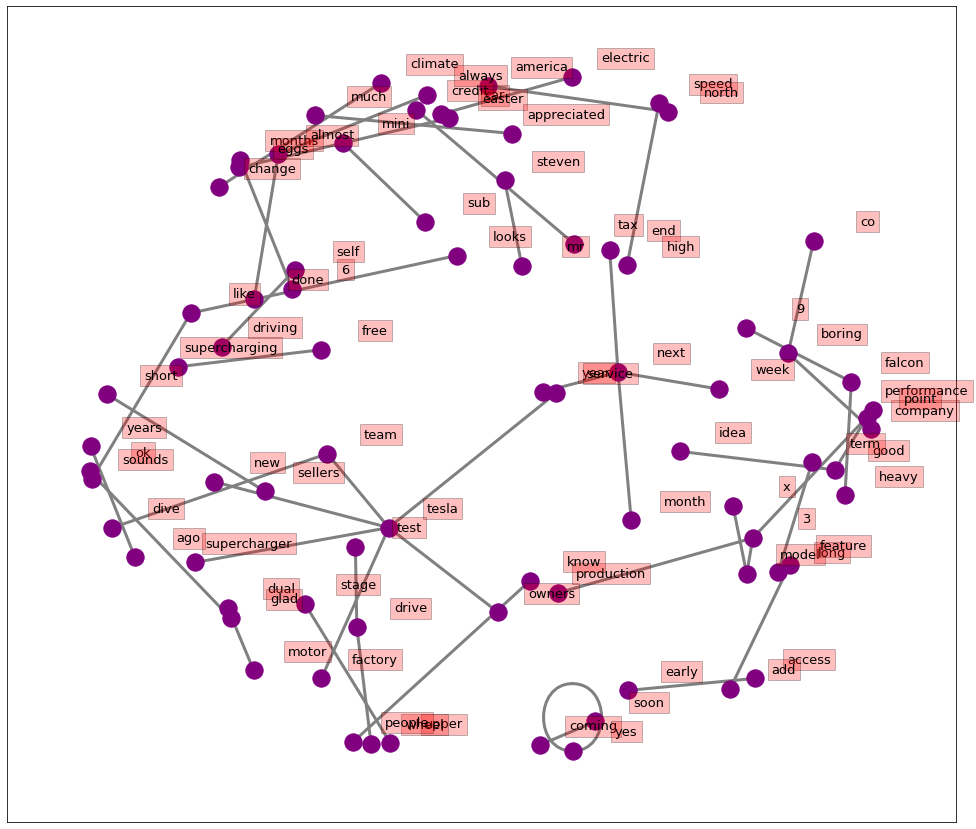

In [21]:
#2018
bg = bigrams(tweets_2018)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(17, 15))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

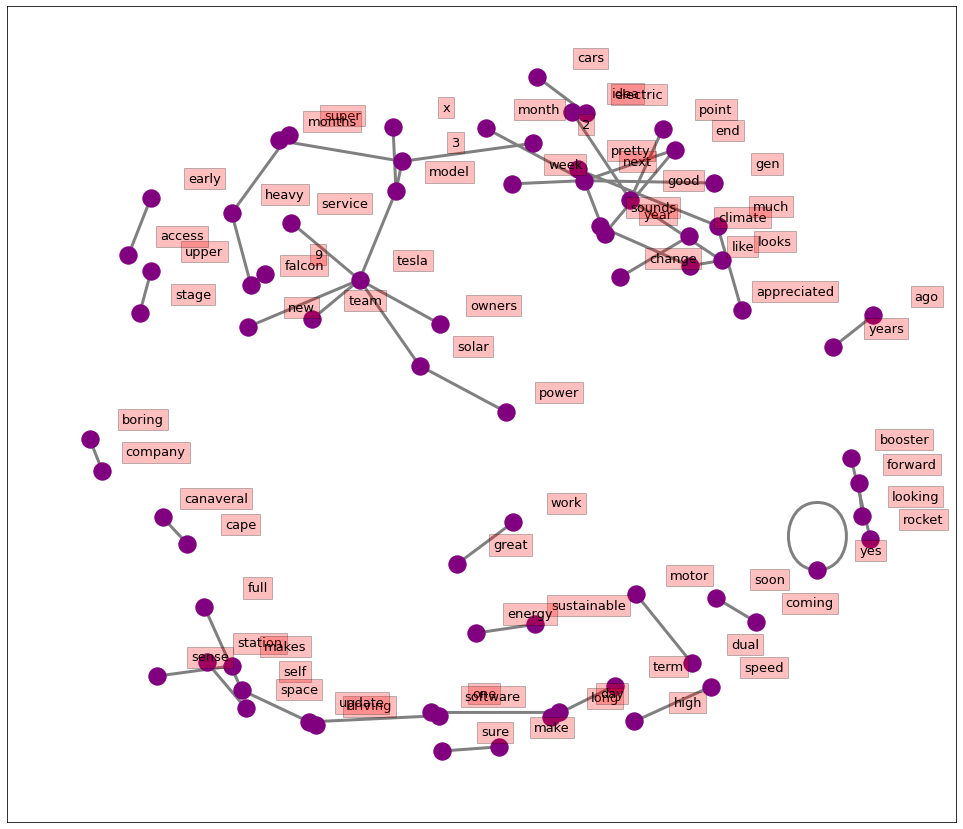

In [38]:
#2019
bg = bigrams(tweets_2019)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(17, 15))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

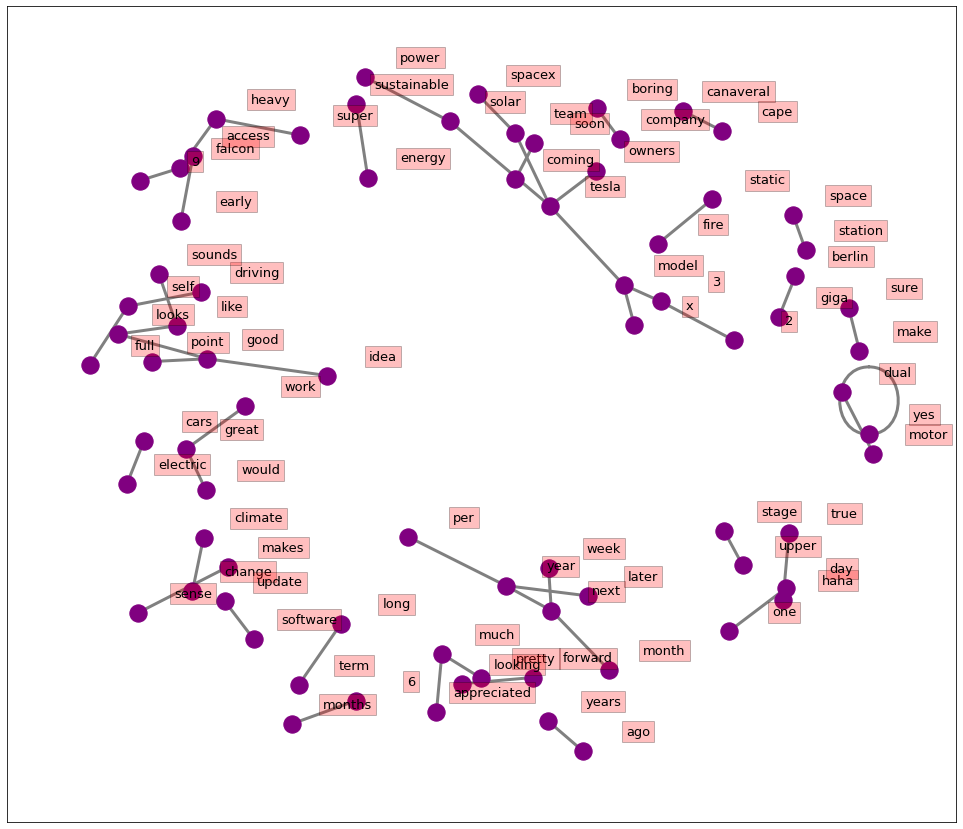

In [32]:
#2020
bg = bigrams(tweets_2020)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(17, 15))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

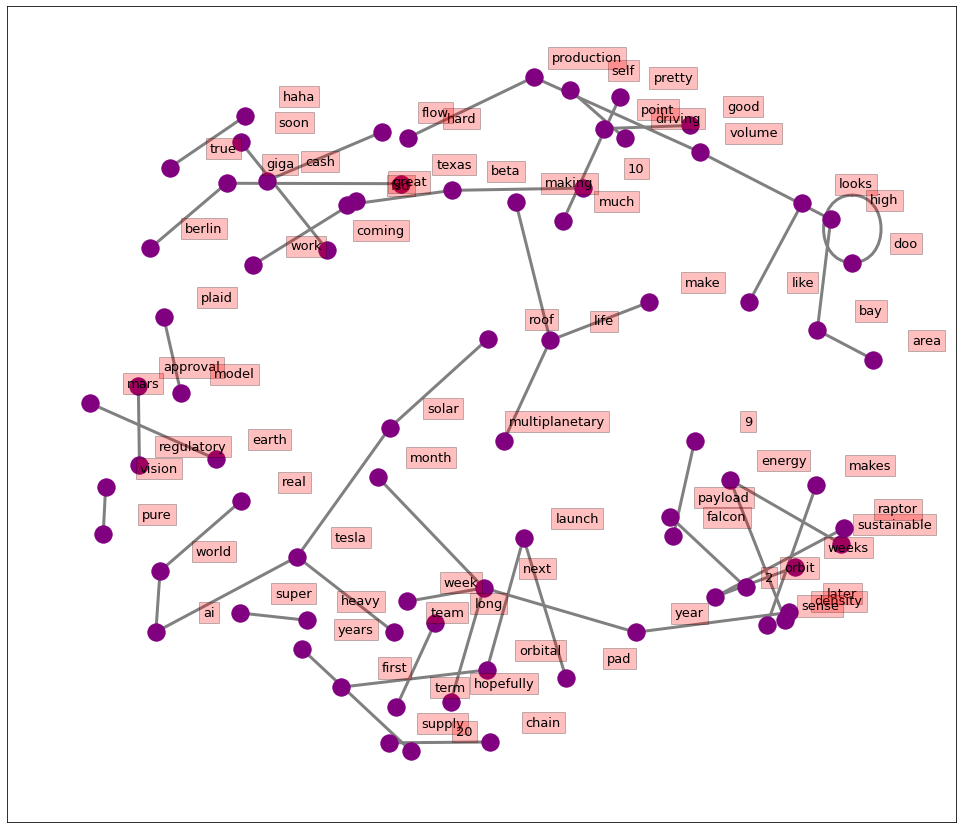

In [37]:
#2021
bg = bigrams(tweets_2021)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(17, 15))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()

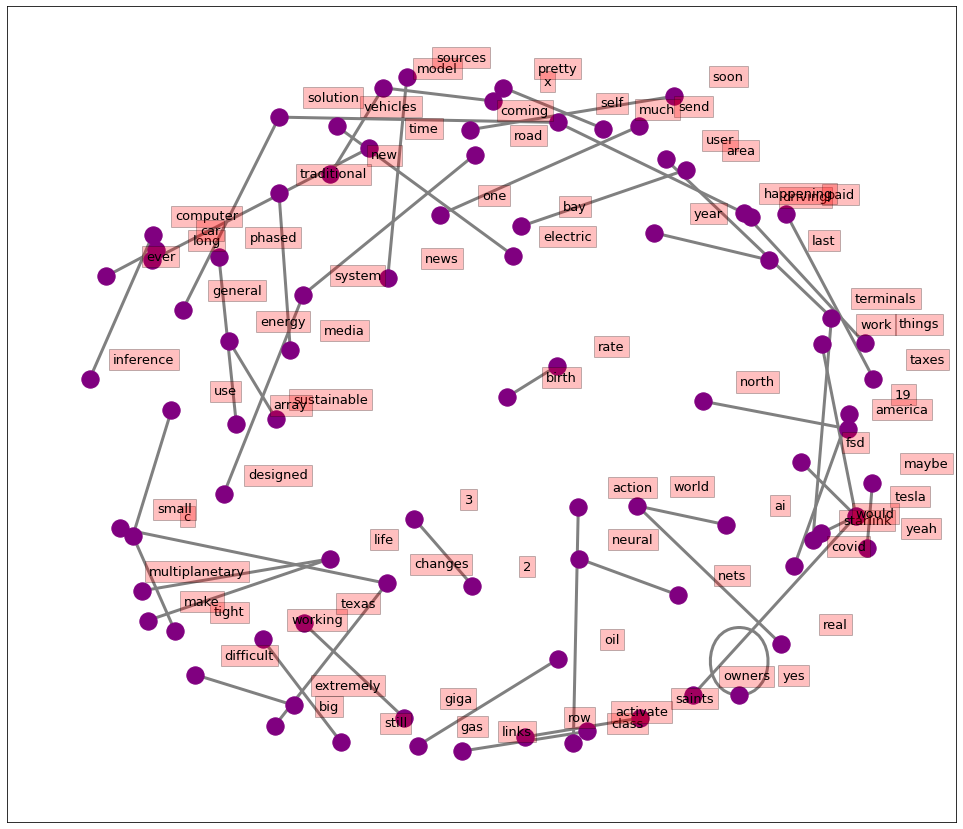

In [36]:
#2022
bg = bigrams(tweets_2022)
bigram_counts = collections.Counter(bg)
bigram_df = pd.DataFrame(bigram_counts.most_common(50),
                             columns=['bigram', 'count'])

#bigram_df
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()


for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
fig, ax = plt.subplots(figsize=(17,15))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='purple',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    
plt.show()